In [127]:
import numpy as np
from scipy.integrate import *
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import sympy as sym
from sympy.solvers import ode
import math

In [128]:
N = 10 # количество элементов ряда 
eps0 = 0.01
mu = 0.0002
tau = 0.5
c = 1
S = 0.01
X_n = lambda x,n : np.sin(n*np.pi*x)
diffX_n = lambda x,n : n*np.pi*np.cos(n*np.pi*x)
alpha_n = lambda n : n*np.pi
Kn = lambda par: quad(lambda x,n: X_n(x,n)*X_n(x,n),0,1,args=(par))[0]
#phi = lambda x : 0.1*np.sin(np.pi*x)
#phi_k = lambda par: quad(lambda x,k: X_n(x,k)*phi(x),0,1,args=(par))[0]
phi_k = lambda par: [0.5,0.8,1.0,0.8,0.5,0,0,0,0,0][par]
#phi_k = lambda par: [0 if i!=3 else 1 for i in range(N)][par]
delta_0m = lambda m: 0 if m==0 else 1
Y_nk = lambda x,n,k: diffX_n(x,n)*diffX_n(x,k)
def f_nk(t,n,k):
    m = t//2
    xm = t - m * 2
    ym = xm - tau
    temp = 0
    if 2*m <= t < 2*m + tau:
        temp = Y_nk(xm,n,k) + delta_0m(m)*Y_nk(-ym,n,k)
    elif 2*m + tau <= t < 2*m + 1:
        temp = Y_nk(xm,n,k) - Y_nk(ym,n,k)
    elif 2*m + 1 <= t < 2*m + 1 + tau:
        temp = Y_nk(-xm + 2*m,n,k) - Y_nk(ym,n,k)
    elif 2*m + 1 + tau <= t < 2*m + 2:
        temp = Y_nk(-xm + 2*m,n,k) -Y_nk(-ym+ 2*m,n,k)
    return (-1)**m*temp
#a_nk = lambda t,n,k: quad(f_nk,0,t,args=(n,k))[0]
def temp_nk(x,t,n,k):
    return (c*t*S)*diffX_n(x,n)*diffX_n(x,k)
a_nk = lambda t,n,k: quad(temp_nk,0,1,args=(t,n,k))[0]



In [129]:
print([phi_k(i) for i in range(N)])

[0.5, 0.8, 1.0, 0.8, 0.5, 0, 0, 0, 0, 0]


In [130]:

M = 40 # количество временных слоёв
ht = 2/M # шаг сетки
T = np.zeros((N,M+1))
U = np.zeros((N,M+1))
for i in range(1,M+1):
    for n in range(1,N+1):
        T[n-1,i] = T[n-1,i-1] + U[n-1,i-1]*ht
        Tsum = 0
        for k in range(1,N+1):
            Tsum += eps0/Kn(n) * a_nk(i*ht,n,k) * (T[k-1,i-1]+phi_k(k-1))
        U[n-1,i] = U[n-1,i-1] + ht*(Tsum - mu*alpha_n(n)**4*T[n-1,i-1])
           

In [131]:
L = 100 # размер пространственной сетки
hx = 1/L
W = np.zeros((L+1,M+1))
for i in range(L+1):
    for j in range(M+1):
        temp = 0
        for n in range(N):
            temp += X_n(i*hx,n+1)*T[n,j]
        W[i,j] = temp    


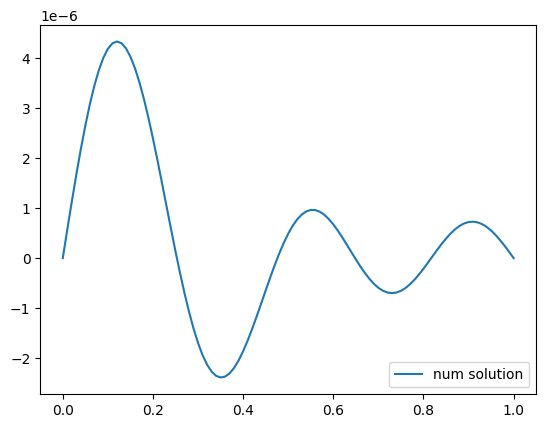

In [132]:
temp_x = np.array([i*hx for i in range(L+1)])
temp_t = np.array([i*ht for i in range(M+1)])
plt.plot(temp_x,W[:,4],label='num solution')
plt.legend(loc='lower right')
plt.show()
# plt.plot(temp_x,phi(temp_x),label='num solution')
# plt.legend(loc='lower right')

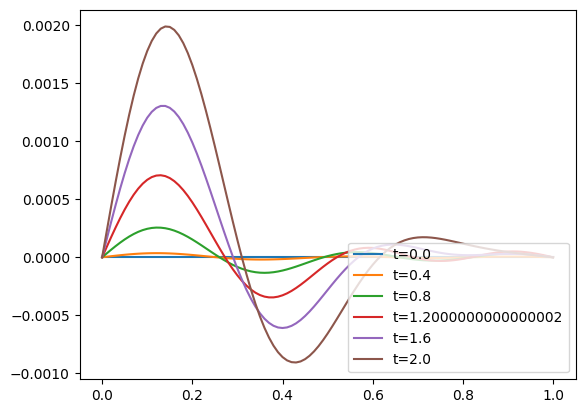

In [133]:
for i in range(0,41,8):
    plt.plot(temp_x,W[:,i],label=f't={i*ht}')
    plt.legend(loc='lower right')
plt.show()        

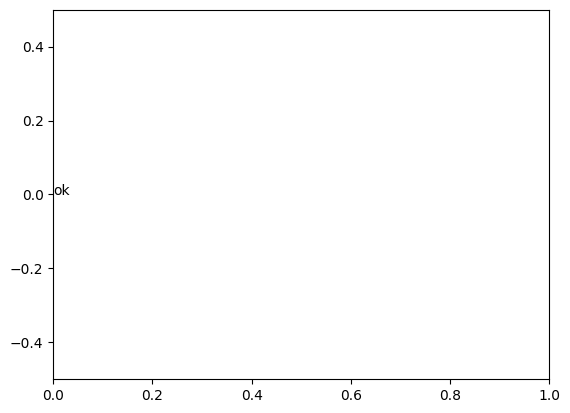

In [134]:
from matplotlib.animation import FuncAnimation

plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure()
ax = plt.axes(xlim=(0,1),ylim=(-0.5,0.5))

line, = ax.plot([],[],'-')
points, = ax.plot([],[],'ro')
txt = ax.text(0,0,'ok')

def init():
    line.set_data([],[])
    points.set_data([],[])
    return line,points,txt
def animate(i):
    line.set_data(temp_x,W[:,i])
    points.set_data(temp_x,W[:,i])
    #txt.set_position([temp_x[5],W[5,i]])
    txt.set_position([0.5,-0.3])
    txt.set_text(f't={temp_t[i]:.5f}')
    return line,points,txt

In [135]:
np.shape(W)

(101, 41)

In [136]:
anim = FuncAnimation(fig,animate,init_func=init,frames=M+1,interval=200,blit=True)

In [137]:
anim